In [1]:
import numpy as np
import math

In [12]:
# Заданные значения id и jd
id = 400
jd = 400

# Заданные начальные значения
w = np.zeros((id + 1, jd + 1))
c = np.zeros(id + 1)
a = np.zeros(id + 1)
cv = np.zeros(id + 1)
G = np.zeros((id + 1, jd + 1))

# Заданные значения
Mah = 0.
dr = 3.0 / id
dtt = math.atan(1.0) * 4.0 / jd

# Заполнение массивов
for i in range(id + 1):
    xi = i * dr + 1.0
    a[i] = 0.5 / (xi * dr)
    c[i] = (dr / (xi * dtt))**2
    cv[i] = 0.5 / (xi * dtt)

cu = 0.5 / dr

# Заполнение массива w
for j in range(jd + 1):
    costt = math.cos(j * dtt)
    for i in range(id + 1):
        xi = i * dr + 1.0
        w[i, j] = (xi + 1.0 / xi) * costt

In [13]:
w

array([[ 2.        ,  1.99993832,  1.99975326, ..., -1.99975326,
        -1.99993832, -2.        ],
       [ 2.00005583,  1.99999414,  1.99980909, ..., -1.99980909,
        -1.99999414, -2.00005583],
       [ 2.00022167,  2.00015998,  1.99997491, ..., -1.99997491,
        -2.00015998, -2.00022167],
       ...,
       [ 4.23594103,  4.23581038,  4.23541845, ..., -4.23541845,
        -4.23581038, -4.23594103],
       [ 4.24296963,  4.24283877,  4.24244619, ..., -4.24244619,
        -4.24283877, -4.24296963],
       [ 4.25      ,  4.24986892,  4.24947569, ..., -4.24947569,
        -4.24986892, -4.25      ]])

In [13]:
u, v, p = uvp(w)

/tmp/ipykernel_40971/3687878008.py:45: RuntimeWarning: invalid value encountered in sqrt
  p[i, j] = np.sqrt(q) * q**2


In [14]:
u

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.63622620e-01,  2.63622620e-01,  2.63452136e-01, ...,
        -2.63452136e-01, -2.63622620e-01, -2.63622620e-01],
       [ 5.28792060e-01,  5.28792060e-01,  5.28456634e-01, ...,
        -5.28456634e-01, -5.28792060e-01, -5.28792060e-01],
       ...,
       [ 9.16871974e-01,  9.16871974e-01,  9.16787799e-01, ...,
        -9.16787799e-01, -9.16871974e-01, -9.16871974e-01],
       [-2.89799098e+02, -2.89799098e+02, -2.89772222e+02, ...,
         2.89772222e+02,  2.89799098e+02,  2.89799098e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [15]:
import matplotlib.pyplot as plt

# Создание сетки в полярных координатах
radius = np.linspace(1, id * dr + dr, id + 1)  # Исправление шага
eta = np.linspace(0, 2 * math.pi, jd + 1)
R, Theta = np.meshgrid(radius, eta)

# Построение графика
# Установка размера фигуры
fig = plt.figure(figsize=(15, 10))

# Построение графика
ax = fig.add_subplot(111, polar=True)
c = ax.contourf(Theta, R, u, cmap='viridis')
plt.colorbar(c, label='Скорость u')
plt.title('График скорости u в полярных координатах')
plt.show()

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, polar=True)
c = ax.contourf(Theta, R, p, cmap='viridis')
plt.colorbar(c, label='Скорость u')
plt.title('График плотности в полярных координатах')
plt.show()

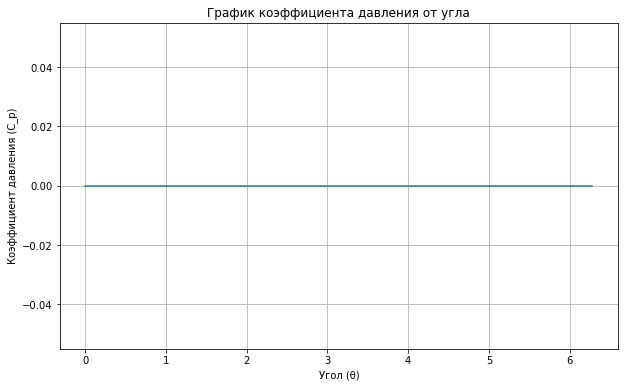

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Заданные значения
gamma = 1.4

# Угловые значения
jd = 400
eta = np.linspace(0, 2 * math.pi, jd)

# Расчет коэффициента давления
def calculate_Cp(p, gamma, mach):
    return (gamma * mach**2 / 2) * (p**gamma - 1)

# Вычисление коэффициента давления для каждого угла
C_p_values = []

for j in range(0, jd):
    p_ = p[0, j]  # Здесь нужно подставить правильное значение плотности rho
    C_p = calculate_Cp(p_, gamma, Mah)
    C_p_values.append(C_p)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(eta, C_p_values)
plt.xlabel('Угол (θ)')
plt.ylabel('Коэффициент давления (C_p)')
plt.title('График коэффициента давления от угла')
plt.grid()
plt.show()


In [16]:
# Заданные значения id и jd
id = 400
jd = 400

# Заданные начальные значения
w = np.zeros((id + 1, jd + 1))
c = np.zeros(id + 1)
a = np.zeros(id + 1)
cv = np.zeros(id + 1)
G = np.zeros((id + 1, jd + 1))

# Заданные значения
Mah = 0.1
dr = 3.0 / id
dtt = math.atan(1.0) * 4.0 / jd

# Заполнение массивов
for i in range(id + 1):
    xi = i * dr + 1.0
    a[i] = 0.5 / (xi * dr)
    c[i] = (dr / (xi * dtt))**2
    cv[i] = 0.5 / (xi * dtt)

cu = 0.5 / dr

# Заполнение массива w
for j in range(jd + 1):
    costt = math.cos(j * dtt)
    for i in range(id + 1):
        xi = i * dr + 1.0
        w[i, j] = (xi + 1.0 / xi) * costt

# Подпрограмма для вычисления скоростей и плотности
def uvp(w):
    u = np.zeros((id, jd + 1))
    v = np.zeros((id + 1, jd + 1))
    p = np.ones((id + 1, jd + 1))
    cMM = Mah * Mah * 0.2
    for j in range(1, jd):
        for i in range(1, id):
            u[i, j] = (w[i + 1, j] - w[i - 1, j]) * cu
            v[i, j] = (w[i, j + 1] - w[i, j - 1]) * cv[i]
            VV = u[i, j]**2 + v[i, j]**2
            q = (1 - VV) * cMM + 1
            p[i, j] = np.sqrt(q) * q**2
        v[0, j] = v[1, j]
    for i in range(1, id):
        u[i, 0] = u[i, 1]
        u[i, jd] = u[i, jd - 1]
    return u, v, p

# Подпрограмма для вычисления коэффициентов
def coeff(w):
    B = np.zeros((id + 1, jd + 1))
    D = np.zeros((id + 1, jd + 1))
    oE = np.zeros((id + 1, jd + 1))
    F = np.zeros((id + 1, jd + 1))
    H = np.zeros((id + 1, jd + 1))
    u, v, p = uvp(w)
    for j in range(1, jd):
        for i in range(1, id):
            B[i, j] = (p[i, j - 1] + p[i, j]) * 0.5 * c[i]
            H[i, j] = (p[i, j] + p[i, j + 1]) * 0.5 * c[i]
            Pim = (p[i - 1, j] + p[i, j]) * 0.5
            Pip = (p[i, j] + p[i + 1, j]) * 0.5
            Eij = Pip + Pim + B[i, j] + H[i, j]
            aP = a[i] * p[i, j]
            F[i, j] = Pip + aP
            D[i, j] = Pim - aP
            oE[i, j] = 1.0 / Eij
    return B, D, oE, F, H

# Подпрограмма для вычисления потенциала
def Wcal(w, B, D, F, H, oE):
    idm, jdm = id, jd
    ww = np.zeros((id + 1, jd + 1))

    for j in range(1, jd):
        for i in range(1, id):
            ww[i, j] = (w[i, j - 1] * B[i, j] +
                        w[i - 1, j] * D[i, j] +
                        w[i + 1, j] * F[i, j] +
                        w[i, j + 1] * H[i, j]) * oE[i, j]

    for j in range(1, jdm):
        for i in range(1, idm):
            w[i, j] = ww[i, j]

    for j in range(jdm, 0, -1):
        for i in range(idm, 0, -1):
            w[i, j] = ww[i, j]
        w[0, j] = w[1, j]
            
    for i in range(0, idm):
        w[i, 0] = w[i, 1]
        w[i, jd] = w[i, jd - 1]

        
        
    for j in range(jdm, 0, -1):
        for i in range(1, idm):
            w[i, j] = ww[i, j]
            
    for j in range(1, jdm):
        for i in range(idm, 1, -1):
            w[i, j] = ww[i, j]
        w[0, j] = w[1, j]
            
    for i in range(1, idm):
        w[i, 0] = w[i, 1]
        w[i, jd] = w[i, jd - 1]

    return w

In [17]:
# Главная программа
iter = 1  # Устанавливаем количество итераций
for itr in range(iter):
    B, D, oE, F, H = coeff(w)
    w = Wcal(w, B, D, F, H, oE)
    print(w)

IndexError: index 400 is out of bounds for axis 1 with size 400

In [44]:
cv

array([159.15494309, 158.67890637, 158.20570884, ...,  39.84850854,
        39.81859972,  39.78873577])

In [ ]:
import numpy as np
import math

# Заданные значения id и jd
id = 400
jd = 400

# Заданные начальные значения
u = np.zeros((id + 1, jd + 1))
v = np.zeros((id + 1, jd + 1))
p = np.ones((id + 1, jd + 1))
w = np.zeros((id + 1, jd + 1))
c = np.zeros(id + 1)
a = np.zeros(id + 1)
cv = np.zeros(id + 1)
B = np.zeros((id + 1, jd + 1))
D = np.zeros((id + 1, jd + 1))
oE = np.zeros((id + 1, jd + 1))
F = np.zeros((id + 1, jd + 1))
H = np.zeros((id + 1, jd + 1))
G = np.zeros((id + 1, jd + 1))

# Заданные значения
Mah = 0.1
dr = 3.0 / id
dtt = math.atan(1.0) * 4.0 / jd

# Заполнение массивов
for i in range(id + 1):
    xi = i * dr + 1.0
    a[i] = 0.5 / (xi * dr)
    c[i] = (dr / (xi * dtt))**2
    cv[i] = 0.5 / (xi * dtt)

cu = 0.5 / dr

# Заполнение массива w
for j in range(jd + 1):
    costt = math.cos(j * dtt)
    for i in range(id + 1):
        xi = i * dr + 1.0
        w[i, j] = (xi + 1.0 / xi) * costt

# Подпрограмма для вычисления скоростей и плотности
def uvp(u, v, p, w, c, a, cv, B, D, oE, F, H, G, Mah, dr, dtt):
    cMM = Mah * Mah * 0.2
    for j in range(1, jd):
        for i in range(1, id):
            u[i, j] = (w[i + 1, j] - w[i - 1, j]) * cu
            v[i, j] = (w[i, j + 1] - w[i, j - 1]) * cv[i]
            VV = u[i, j]**2 + v[i, j]**2
            q = (1 - VV) * cMM + 1
            p[i, j] = np.sqrt(q) * q**2

    for i in range(1, id):
        u[i, 0] = u[i, 1]
        u[i, jd] = u[i, jd - 1]

    return u, v, p

# Подпрограмма для вычисления коэффициентов
def coeff(u, v, p, w, B, D, oE, F, H, a):
    u, v, p = uvp(u, v, p, w, c, a, cv, B, D, oE, F, H, G, Mah, dr, dtt)
    for j in range(1, jd):
        for i in range(1, id):
            B[i, j] = (p[i, j - 1] + p[i, j]) * 0.5 * c[i]
            H[i, j] = (p[i, j] + p[i, j + 1]) * 0.5 * c[i]
            Pim = (p[i - 1, j] + p[i, j]) * 0.5
            Pip = (p[i, j] + p[i + 1, j]) * 0.5
            Eij = Pip + Pim + B[i, j] + H[i, j]
            aP = a[i] * p[i, j]
            F[i, j] = aP + Pip
            D[i, j] = Pim - aP
            oE[i, j] = 1.0 / Eij

    return B, D, oE, F, H

# Подпрограмма для вычисления потенциала
def Wcal(w, B, D, F, H, oE):
    idm, jdm = id - 1, jd - 1
    ww = np.zeros((id + 1, jd + 1))

    for j in range(0, jd ):
        for i in range(0, id):
            ww[i, j] = (w[i, j - 1] * B[i, j] +
                        w[i - 1, j] * D[i, j] +
                        w[i + 1, j] * F[i, j] +
                        w[i, j + 1] * H[i, j]) * oE[i, j]

    for j in range(jdm, 0, -1):
        for i in range(idm, 0, -1):
            w[i, j] = ww[i, j]

    for i in range(1, idm):
        w[i, 0] = w[i, 1]
        w[i, jd] = w[i, jdm]

    for j in range(jdm, 0, -1):
        for i in range(1, idm):
            w[i, j] = ww[i, j]

    for j in range(1, jdm):
        w[0, j] = w[1, j]

    for i in range(1, idm):
        w[i, 0] = w[i, 1]
        w[i, jd] = w[i, jdm]

    return w

# Главная программа
iter = 5  # Устанавливаем количество итераций
for itr in range(iter):
    B, D, oE, F, H = coeff(u, v, p, w, B, D, oE, F, H, a)
    w = Wcal(w, B, D, F, H, oE)
    print(w)